In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
correct_class = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', \
                 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

In [4]:
cifar = tf.keras.datasets.cifar10 
(x_train, y_train), (x_test, y_test) = cifar.load_data()
x_train_sub, y_train_sub = fetch_selected_data_10(x_train, y_train)
x_test_sub, y_test_sub = fetch_selected_data_10(x_test, y_test)

In [22]:
# cifar100 = tf.keras.datasets.cifar100
# (x_train_o, y_train_o), (x_test_o, y_test_o) = cifar100.load_data()
# x_train_o1, y_train_o1 = fetch_selected_data_100(x_train_o, y_train_o)
# x_test_o1, y_test_o1 = fetch_selected_data_100(x_test_o, y_test_o)
# x_train_np, y_train_np = np.concatenate((x_train_o1, x_test_o1), axis=0), np.concatenate((y_train_o1, y_test_o1), axis=0)

In [5]:
from build_augmentor import get_random_data, fetch_selected_data, get_random_shuffle_set, TransformDataset

In [7]:
def create_custom_noisy_set(x_train_i, y_train_i):
    ratio1 = {'mixed_transformations':.45}
    ratio2 = {'random_image_eraser':1}
    ratio3 = {"add_gaussian_noise": 0.2, "add_sp_noise": 0.4, "add_poisson_noise":.2, 'add_multiplicative_noise':.2}
    
    x_train_r1, y_train_r1 = get_random_shuffle_set(x_train_i, y_train_i, ratio1)
    x_train_r2, y_train_r2 = get_random_shuffle_set(x_train_i, y_train_i, ratio2)
    x_train_r3, y_train_r3 = get_random_shuffle_set(x_train_i, y_train_i, ratio3)
    
    final_x_train = np.concatenate((x_train_r1, x_train_r2, x_train_r3), axis=0)
    final_y_train = np.concatenate((y_train_r1, y_train_r2, y_train_r3), axis=0)
    
    x_train_shuffled, y_train_shuffled = get_random_data(final_x_train, final_y_train, 0, \
                                                         final_x_train.shape[0], max_samples=final_x_train.shape[0])
    
    return x_train_shuffled, y_train_shuffled

In [8]:
x_train_noisy, y_train_noisy = create_noisy_set(x_train_sub, y_train_sub)

In [24]:
x_train_noisy.shape, y_train_noisy.shape

((61250, 32, 32, 3), (61250, 10))

In [25]:
#x_test_noisy, y_test_noisy = create_noisy_set(x_test_sub, y_test_sub)
print (x_test_noisy.shape, y_test_noisy.shape)

(12250, 32, 32, 3) (12250, 10)


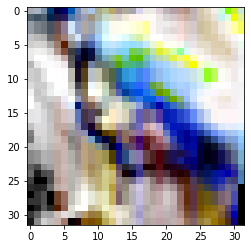

In [20]:
plt.imshow(x_train_noisy[np.random.randint(0, 1000)])

In [ ]:
np.save('noisy_dataset/noisy/cifar_10_')

In [51]:
zipped_data = np.zeros((1, 4))

ValueError: setting an array element with a sequence.

In [28]:
x1, y1, x2, y2 = zipped_data

In [38]:
np.sum((y2-y_test_noisy)**2)

0.0

In [44]:
zipped = np.load('noisy_dataset/cifar_10.npy')

ValueError: Object arrays cannot be loaded when allow_pickle=False